# Data Science: Coursework 1

### Shri Lekkala
### CID: 01499487

In [88]:
# Import modules used throughout the coursework
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from collections import Counter

# Set a random seed to fix the results
np.random.seed(1024)

## Task 1: Regression
***

### 1.1 Linear Regression
***

#### Question 1.1.1
***

First the training and the test data are imported

In [2]:
# import training and test sets
test_data = pd.read_csv('./regression_test.csv', header=None)
train_data = pd.read_csv('./regression_train.csv', header=None)

We can check the structure of the dataset as below:

In [3]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,-0.413447,-0.487722,0.115738,0.115735,0.158124,0.984960,0.797449,-0.773684,0.985161,-0.803212,1.176466,0.441052,-0.983048,0.158124,1.176469,-0.487723,-0.773598,23.9
1,1.0,-0.412788,-0.487722,-1.034027,-1.034035,-0.386091,0.819700,0.207144,-0.418203,0.819617,-0.666608,-0.857929,0.379323,-0.803625,-0.386091,-0.857939,-0.487723,-0.418305,29.9
2,1.0,-0.387983,-0.487722,-0.211099,-0.211084,0.261784,-0.510932,-0.923682,-0.671859,-0.511320,-0.102376,0.344213,0.441052,0.131334,0.261784,0.344218,-0.487727,-0.671863,24.5
3,1.0,-0.347952,-0.487722,-0.720322,-0.720323,-0.412006,0.846768,0.324494,-0.248591,0.846699,-0.601276,-0.488039,0.369674,-0.381702,-0.412006,-0.488023,-0.487722,-0.248524,27.5
4,1.0,-0.330562,-0.487722,-0.437258,-0.437249,-0.144217,0.299699,0.918355,0.313581,0.299802,-0.601276,1.176466,0.342811,0.020597,-0.144217,1.176460,-0.487724,0.313542,18.4


Firstly we note that there is already a column of ones for the intercept term in linear regression.

Usually, we make a decision on whether and how to standardise the data here.
However by checking the full data (both training and test together), we see that it is already standardised:

In [4]:
# NB our data is already standardised
full_data = pd.concat([test_data, train_data])
full_X = np.array(full_data.iloc[:,:-1])
print(np.mean(full_X, 0).round(decimals=3))
print(np.std(full_X, 0))

[ 1. -0.  0. -0.  0.  0. -0. -0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0.]
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Thus, except in the case where the column is all ones, the mean of each column is 0 and the standard deviation is 1.

Next we separate the data sets in terms of the X and the Y datasets:

In [5]:
X_train = np.array(train_data.iloc[:,:-1])
Y_train = np.array(train_data.iloc()[:,-1])

X_test = np.array(test_data.iloc[:,:-1])
Y_test = np.array(test_data.iloc()[:,-1])

As we have explored maximum likelihood estimation in lectures, I will apply the same method for this regression problem.

In particular we wish to obtain the parameters  $\boldsymbol\beta^{\mathrm{ML}}$ that maximize the likelihood
$$
p(\mathcal Y | \mathcal X, \boldsymbol\beta) = \prod_{n=1}^N p(y_n | \boldsymbol x_n, \boldsymbol\beta)\,.
$$

And once we have that we can can compute the maximum likelihood estimate using the formula:
$$
\boldsymbol\beta^{\text{ML}} = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y \, .
$$


In [6]:
# Function to compute the MLE given X and y
def max_lik_estimate(X, y):
    # X: N x D matrix of training inputs
    # y: N x 1 vector of training targets/observations
    # returns: maximum likelihood parameters (D x 1)
    N, D = X.shape
    
    beta_ml = np.linalg.solve(X.T @ X, X.T @ y)
    return beta_ml

Next we have a function that outputs the predicted values given some test data and the beta parameters of the model.

In [7]:
def predict_with_estimate(X_test, beta):
    # X_test: K x D matrix of test inputs
    # beta: D x 1 vector of parameters
    # returns: prediction of f(X_test); K x 1 vector
    
    prediction = X_test @ beta
    
    return prediction 

The parameters of this particular model are obtained below:

In [8]:
beta_ml = max_lik_estimate(X_train,Y_train)
print(beta_ml)

[ 2.25206705e+01 -6.23509421e-01  5.07191271e+03 -3.55100636e+04
  3.55098886e+04  1.39496495e+09  9.79427526e+02 -1.64223172e-01
  1.20208274e+03 -9.76305983e+02 -5.01509709e-02 -6.12934767e+03
  7.48646362e-01 -3.71494965e+00 -1.39496496e+09  6.12761154e+03
 -5.07077881e+03 -1.20558061e+03]


Next the in-sample MSE is calculated below:

In [9]:
# in sample MSE
train_preds = predict_with_estimate(X_train, beta_ml)
MSE_train = np.mean((Y_train - train_preds) ** 2)
print("In sample MSE    : " + str(MSE_train))

In sample MSE    : 24.38006444485437


#### Question 1.1.2
***

We then use the model on the test data and obtain a prediction which is used to compute the out-of-sample MSE.

In [10]:
# out of sample MSE
test_preds = predict_with_estimate(X_test, beta_ml)
MSE_test = np.mean((Y_test - test_preds) ** 2)
print("Out of sample MSE: " + str(MSE_test))

Out of sample MSE: 19.525828624573784


We observe the the out-of-sample MSE seems to be lower than the in-sample MSE.
Initially we might think this is strange as the model was trained using in-sample data, but performs better on the out-of-sample data.

However this can be explained by the fact that there could be outliers in the training set causing the MSE to be higher. Furthermore, as the training set is assumed to be one random sample from the available data, this could just be a case where the sample is not representative of the whole dataset.

### 1.2 Ridge Regression
***

#### Question 1.2.1
***

Next we implement a ridge regression model, which is similar to linear regression, however we add a penalty term  $\lambda$.

So in the least squares sense of linear regression, the loss function is:

$$
\underset{\boldsymbol\beta}{\text{min}} \ \text{L}_{\text{ridge}} (\boldsymbol\beta) = \underset{\boldsymbol\beta}{\text{min}} \| \mathcal Y - \mathcal X \boldsymbol\beta \|^2 + \lambda \| \boldsymbol\beta \|^2 
$$

and the beta parameters we obtain is given by the formula:

$$
\boldsymbol\beta^{*}_{\text{ridge}} = (\boldsymbol X^T\boldsymbol X + \lambda I)^{-1}\boldsymbol X^T\boldsymbol y \, .
$$

First we have a function to compute and return the beta parameters for ridge regression.

In [11]:
def ridge_estimate(X, y, penalty):
    # X: N x D matrix of training inputs
    # y: N x 1 vector of training targets/observations
    # returns: maximum likelihood parameters (D x 1)
    
    N, D = X.shape
    I = np.identity(D)
    beta_ridge = np.linalg.solve(X.T @ X + penalty * I, X.T @ y)
    return beta_ridge

As our aim is to perform cross-validation, next we have a function to randomly split a given dataset into the given number of folds as required.

In [12]:
def cross_val_split(data, num_folds):
  fold_size = int(len(data) / num_folds)
  data_perm = np.random.permutation(data)
  folds = []
  for k in range(num_folds):
    folds.append(data_perm[k*fold_size:(k+1)*fold_size, :])

  return folds

Next we aggregate the X and Y data into one array, so they can be used for cross validation.
And we generate the folds which are stored in a dictionary.

In [13]:
train = np.hstack((X_train, Y_train[:, np.newaxis]))

# Generate the folds
folds = cross_val_split(train, 5)

In order to scan the optimal $\lambda$ term, we create a vector of different possible lambdas from 0 to 100

In [14]:
lambda_vec = np.linspace(0, 100, num=1001)

Finally, we create a function that has one loop through the set of folds and another loop over the vector of lambdas, and applies ridge ression to every possible combination of these.

The training and validation MSEs are also computed in the function and they are stored in dictionaries which are returned at the end of the function.

In [15]:
def cross_val_evaluate_ridge(folds, lambda_vec):
    # create dictionaries
    train_MSE = {1:[], 2:[], 3:[], 4:[], 5:[]}
    val_MSE = {1:[], 2:[], 3:[], 4:[], 5:[]}

    for i in range(len(folds)):
        print('Fold', i+1)
        # define the training set (i.e. selecting all folds and deleting the one used for validation)
        train_set = np.delete(np.asarray(folds).reshape(len(folds), folds[0].shape[0], folds[0].shape[1]), i, axis=0)
        train_folds = train_set.reshape(len(train_set)*train_set[0].shape[0], train_set[0].shape[1])
        X_train = train_folds[:,:-1]
        y_train = train_folds[:, -1]
        
        # define the validation set
        val_fold = folds[i]
        X_val = val_fold[:,:-1]
        y_val = val_fold[:, -1]
    
        # train the model and obtain the parameters for each lambda
        for pen in lambda_vec:
            
            beta_ridge = ridge_estimate(X_train, y_train, penalty=pen)
            
            # evaluate
            # training data MSE
            train_preds_ridge = predict_with_estimate(X_train, beta_ridge)
            MSE_train_ridge = np.mean((y_train - train_preds_ridge) ** 2)
            
            # validation data MSE
            test_preds_ridge = predict_with_estimate(X_val, beta_ridge)
            MSE_val_ridge = np.mean((y_val - test_preds_ridge) ** 2)
            
            # store these in the appropriate dictionaries
            train_MSE[i+1].append(MSE_train_ridge)
            val_MSE[i+1].append(MSE_val_ridge)
    
    print("Training finished.")
    return train_MSE, val_MSE

We then call and run the function using our folds and lambda vector

In [16]:
train_MSE, val_MSE = cross_val_evaluate_ridge(folds, lambda_vec)

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Training finished.


Next, we consider a particular fold, in this case fold 1.
And we plot the MSE errors obtained against the different penalty terms:

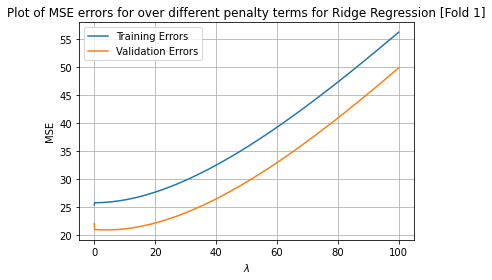

Optimal λ for Fold 1 is 3.9000000000000004


In [17]:
plt.title("Plot of MSE errors for over different penalty terms for Ridge Regression [Fold 1]")
plt.plot(lambda_vec, train_MSE[1], label = "Training Errors")
plt.plot(lambda_vec, val_MSE[1], label = "Validation Errors")
plt.legend()
plt.grid()
plt.xlabel("$\lambda$")
plt.ylabel("MSE")
plt.show()
print("Optimal λ for Fold 1 is " + str(lambda_vec[np.argmin(val_MSE[1])]))

Note that the optimal $\lambda$ for each fold is obtained by taking the index of the minimum of the validation MSE, and using that index to find the corresponding lambda.

This is done for each of the five folds:

In [18]:
# The optimal lambdas for for each fold obtained using argmin
for i in range(0,5):
    print("Optimal λ for Fold " + str(i+1) + " is " + str(lambda_vec[np.argmin(val_MSE[i+1])]))

Optimal λ for Fold 1 is 3.9000000000000004
Optimal λ for Fold 2 is 0.1
Optimal λ for Fold 3 is 13.3
Optimal λ for Fold 4 is 17.0
Optimal λ for Fold 5 is 0.1


#### Question 1.2.2
***

In order to compute the average in-sample and out-of-sample MSEs, we first need to obtain the optimal $\lambda$ out of all the folds.

This is done by computing the average validation MSE over all the folds for each $\lambda$, and then finding the minimum over this:

In [19]:
# Compute the average validation MSE over the folds, to get average for each penalty term
average_val_MSE = np.mean([val_MSE[fold] for fold in range(1, 6)], axis = 0)
optimal_lambda = lambda_vec[np.argmin(average_val_MSE)]
print("The optimal lambda is: " + str(optimal_lambda))

The optimal lambda is: 1.3


We then train the model over the whole of the training data using this optimal lambda parameter.

In [20]:
beta_ridge = ridge_estimate(X_train, Y_train, penalty=optimal_lambda)

The resulting MSEs are obtained below:

In [21]:
# in sample MSE
train_preds_ridge = predict_with_estimate(X_train, beta_ridge)
MSE_train_ridge = np.mean((Y_train - train_preds_ridge) ** 2)

# out of sample MSE
test_preds_ridge = predict_with_estimate(X_test, beta_ridge)
MSE_test_ridge = np.mean((Y_test - test_preds_ridge) ** 2)

print("Ridge - In sample error    : " + str(MSE_train_ridge))
print("Ridge - Out of sample error: " + str(MSE_test_ridge))

Ridge - In sample error    : 24.559828320867624
Ridge - Out of sample error: 19.360934376274972


For comparsion, the MSEs obtained via linear regression are as below:

In [22]:
print("Linear Regression - In sample error    : " + str(MSE_train))
print("Linear Regression - Out of sample error: " + str(MSE_test))

Linear Regression - In sample error    : 24.38006444485437
Linear Regression - Out of sample error: 19.525828624573784


Thus we can see that both the methods produce very similar results, with the ridge regression obtaining slightly out-of-sample MSE (which is the target we are interested in).

The ridge regression model has a penalty term whose effect is to try and keep the coefficients small, and the benefit of this is that there can be lower variance in the model.  

We do indeed observer that the the coefficients (the beta vector for ridge) are smaller:

In [23]:
# Differences observed in parameters
abs_diff_beta = np.abs(beta_ml - beta_ridge)

df_beta_parameters = pd.DataFrame(columns=['Linear Regression Parameters', 
                                           'Ridge Regression Parameters',
                                           'Absolute Difference in Parameters'],
                                  index=[['β_%s' %i for i in range(18)]],
                                  data = np.array([beta_ml, beta_ridge, abs_diff_beta]).T)

pd.set_option('display.float_format', str)

df_beta_parameters.round(3)

,Linear Regression Parameters,Ridge Regression Parameters,Absolute Difference in Parameters
β_0,22.521,22.455,0.065
β_1,-0.624,-0.636,0.012
β_2,5071.913,0.572,5071.34
β_3,-35510.064,-0.1,35509.963
β_4,35509.889,-0.1,35509.988
β_5,1394964953.358,-0.84,1394964954.198
β_6,979.428,1.585,977.842
β_7,-0.164,-0.148,0.017
β_8,1202.083,-1.732,1203.814
β_9,-976.306,1.56,977.866


In particular, ridge regression is advantageous in the cases where many predictors are collinear with eachother, however if this is not the case then ridge may not provide any significant advantage.

We can investigate this collinearity using a correlation matrix:

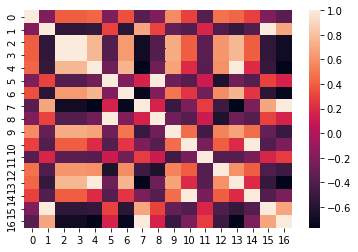

In [24]:
# Correlation Matrix
corr_mat = pd.DataFrame(X_train).corr()
sns.heatmap(np.array(corr_mat)[1:, 1:])
plt.show()

Here, the lighter squares correspond to precitors being very correlated.
We have excluded the column of ones here, and we observe that apart from the diagonal, there only seem to be very few highly correlated predictors. For example on the diagram we can observe predictors 1 and 15 appear to be highly correlated.

However the vast majority are much darker, suggesting that there is not a significant amount of collinearity present in general. And hence ridge regression can only provide a small advantage (as seen by the lower MSE).

### 1.3 Regression with $k$ nearest neighbours ($knn$)
***

#### Question 1.3.1
***

Firstly, we begin by making our knn algorithm.

The k nearest neighbours algorithm works by computing the distances between a given test set and the samples from the training set. It then selects the $k$ nearest neighbours to each point in the test set, and in the case of regression, averages these values in the neighbourhood to form a prediciton.

In [25]:
# distance function for kNN
def euclidian_distance(p, q):
    return np.sqrt(np.sum((q-p)**2, axis = 1))

# function to find the k nearest neighbours in the training set given a test set
def k_neighbours(X_train, X_test, k=5, return_distance=False):
    dist = []
    neigh_ind = []
    
    # compute distance from each point x_text in X_test to all points in X_train 
    point_dist =  [euclidian_distance(x_test, X_train) for x_test in X_test]
    
    # determine which k training points are closest to each test point
    for row in point_dist:
        enum_neigh = enumerate(row)
        sorted_neigh = sorted(enum_neigh, key=lambda x: x[1])[:k]
    
        ind_list = [tup[0] for tup in sorted_neigh]
        dist_list = [tup[1] for tup in sorted_neigh]
    
        dist.append(dist_list)
        neigh_ind.append(ind_list)
    
    # return distances together with indices of k nearest neighbours
    if return_distance:
        return np.array(dist), np.array(neigh_ind)
    
    return np.array(neigh_ind)

In [26]:
# A function to predict the values of the test points.
def reg_predict(X_train, Y_train, X_test, k):
    # each of the k neighbours contributes equally to the classification of any data point in X_test  
    neighbours = k_neighbours(X_train, X_test, k=k)
    # compute mean over neighbours labels 
    Y_pred = np.array([np.mean(Y_train[neighbour]) for neighbour in neighbours])
    return Y_pred

Finally, we need a measure of how well the model predicts the y values.
For this we use the $R^2$ score.

$$
R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2} \, ,
$$
where $\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i$.

In [27]:
# Function that calculates the R2 score given the predictions and actual values
def r2_score(y_test, y_pred):
    numerator = np.sum((y_test - y_pred)**2)
    y_avg = np.mean(y_test)
    denominator = np.sum((y_test - y_avg)**2)
    return 1 - numerator/denominator

Again, in order to scan the optimal parameter term (in this case $k$), we create a vector of different possible values from 1 to 50

In [28]:
k_vec = np.arange(50)+1

In [29]:
def cross_val_evaluate_kNN(folds, k_vec):
    
    # create dictionaries
    train_MSE = {1:[], 2:[], 3:[], 4:[], 5:[]}
    val_MSE = {1:[], 2:[], 3:[], 4:[], 5:[]}

    for i in range(len(folds)):
      
        print('Fold', i+1)
        # define the training set (i.e. selecting all folds and deleting the one used for validation)
        train_set = np.delete(np.asarray(folds).reshape(len(folds), folds[0].shape[0], folds[0].shape[1]), i, axis=0)
        train_folds = train_set.reshape(len(train_set)*train_set[0].shape[0], train_set[0].shape[1])
        X_train = train_folds[:,:-1]
        y_train = train_folds[:, -1]
        
        # define the validation set
        val_fold = folds[i]
        X_val = val_fold[:,:-1]
        y_val = val_fold[:, -1]
    
        # train the model and obtain the parameters for each k
        for k_param in k_vec:                        
            train_preds_kNN = reg_predict(X_train, y_train, X_train, k_param)
            val_preds_kNN = reg_predict(X_train, y_train, X_val, k_param)
            
            # evaluate
            # training data MSE
            MSE_train_kNN = np.mean((y_train - train_preds_kNN) ** 2)
            
            # validation data MSE
            MSE_val_kNN = np.mean((y_val - val_preds_kNN) ** 2)
            
            # store these in the appropriate dictionaries
            train_MSE[i+1].append(MSE_train_kNN)
            val_MSE[i+1].append(MSE_val_kNN)
    
   
    print("Training finished.")
    return train_MSE, val_MSE

As before, we create a function that has one loop through the set of folds and another loop over the vector of $k$s, and applies the kNN model for wach combination

The training and validation MSEs are also computed similarly and stored in dictionaries again:

Perform the cross validation for each parameter value as required:

In [30]:
train_MSE_kNN, val_MSE_kNN = cross_val_evaluate_kNN(folds, k_vec)

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Training finished.


Again, consider Fold 1 from our set of folds.
We see in the function above that for this fold, a new model is created for each $k$, and the two MSEs are computed.
These can then be plotted as below:

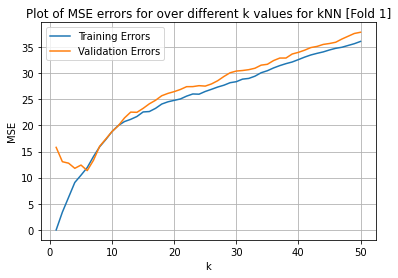

In [31]:
plt.title("Plot of MSE errors for over different k values for kNN [Fold 1]")
plt.plot(k_vec, train_MSE_kNN[1], label = "Training Errors")
plt.plot(k_vec, val_MSE_kNN[1], label = "Validation Errors")
plt.legend()
plt.grid()
plt.xlabel("k")
plt.ylabel("MSE")
plt.show()

From the plot we can see that the training MSE is a strictly increasing function of k, however for the validation error, there appears to be a minimum in the MSE between 0 and 10.

We can obtain the optimal $k$ at which this happens using the "argmin" function as before:

In [32]:
print("Optimal k for Fold 1 is " + str(k_vec[np.argmin(val_MSE_kNN[1])]))

Optimal k for Fold 1 is 6


Similarly, the optimal parameter for each of the five folds are obtained below:

In [33]:
for i in range(0,5):
    print("Optimal k for Fold " + str(i+1) + " is " + str(k_vec[np.argmin(val_MSE_kNN[i+1])]))

Optimal k for Fold 1 is 6
Optimal k for Fold 2 is 2
Optimal k for Fold 3 is 5
Optimal k for Fold 4 is 4
Optimal k for Fold 5 is 2


In terms of the distribution of errors, it makes sense that there will be an optimal $k$ corresponding to a local minimum of the validation MSE. 

For very small $k$, we expect the model to perform very well for the training set (as each prediction has the actual value as one of the few neighbours), however it is also likely overfit to this set, and as a result it will not be generalisable to any new set (such as the validation set)

In contrast, if $k$ is very large, then the model will no longer be very local as many neighbours will be selected for each point. Thus, this will no longer perform well for either the training or the validation set.

And thus we expect there to be a minimum value of k that is small, but not small enough to overfit.

#### Question 1.3.1
***

Next, we find the optimal value of k over all of the folds as follows:

In [40]:
# Compute the average validation MSE over the folds, to get average for each penalty term
average_val_MSE_kNN = np.mean([val_MSE_kNN[fold] for fold in range(1, 6)], axis = 0)
optimal_k = k_vec[np.argmin(average_val_MSE_kNN)]
print("The optimal k overall is: " + str(optimal_k))

The optimal k overall is: 2


We then use this to train the model over the whole training dataset using the optimal $k$, and then obtain the in-sample and out-of-sample MSEs using the training and the test data respectively:

In [42]:
# in sample MSE
train_preds_kNN = reg_predict(X_train, Y_train, X_train, optimal_k)
MSE_train_kNN = np.mean((Y_train - train_preds_kNN) ** 2)

# out of sample MSE
test_preds_kNN = reg_predict(X_train, Y_train, X_test, optimal_k)
MSE_test_kNN = np.mean((Y_test - test_preds_kNN) ** 2)

print("Cross-val kNN - In sample error        : " + str(MSE_train_kNN))
print("Cross-val kNN - Out of sample error    : " + str(MSE_test_kNN))

Cross-val kNN - In sample error        : 3.973725247524753
Cross-val kNN - Out of sample error    : 13.935808823529408


And we can also get a measure of the accuracies using the $R^2$ score:

In [43]:
print('Cross-val kNN Train set mean accuracy  :', r2_score(Y_train, train_preds_kNN))
print('Cross-val kNN Test set mean accuracy   :', r2_score(Y_test, test_preds_kNN))

Cross-val kNN Train set mean accuracy  : 0.9557419532102102
Cross-val kNN Test set mean accuracy   : 0.7619048240726203


The MSE values for each of the 3 models are summarised below:

In [44]:
reg_MSE = np.array([[MSE_train, MSE_test],[MSE_train_ridge, MSE_test_ridge], [MSE_train_kNN, MSE_test_kNN]])
reg_MSE_df = pd.DataFrame(reg_MSE, columns = ["Training", "Validation"], index = ["Linear Regression", "Ridge Regression", "kNN"])
reg_MSE_df

,Training,Validation
Linear Regression,24.38006444485437,19.525828624573784
Ridge Regression,24.559828320867624,19.360934376274972
kNN,3.973725247524753,13.935808823529408


Thus we see that the kNN model appears to have a much higher performance when comparing the Validation MSEs.
This could be explained by the fact that the Linear and Ridge regression models require the assumption of linearity in the data, however as kNN is a local model, it can also deal with any non-linearity which may be present.

Furthermore, as we have no other information about the data, we are unsure if the data is homogeneous or not (that is drawn from a single or similar populations).

The fact that the regression models performed slighlty worse may suggest that there is some inhomogeneity iand so one regression model for all the data might not be suitable. One possible way we could deal with an inhomogeneous data set, is by fitting different models over different regions, for example various kNN models for particular regions, each with an optimal $k$ for that area.

## Task 2: Classification
***

### 2.1 Logistic Regression
***

#### Question 2.1.1
***

We start by importing the data used for the classification task, separating them into X and Y sets and creating panda dataframes and numpy arrays for use as appropriate.

In [47]:
test_data = pd.read_csv('./classification_test.csv', header=None)
train_data = pd.read_csv('./classification_train.csv', header=None)

# Create DataFrames
df_X_train = train_data[train_data.columns[:-1]]
df_Y_train = train_data[train_data.columns[-1]]

df_X_test = test_data[test_data.columns[:-1]]
df_Y_test = test_data[test_data.columns[-1]]

# Create Numpy Arrays
X_train = np.array(train_data.iloc[:,:-1])
Y_train = np.array(train_data.iloc()[:,-1])

X_test = np.array(test_data.iloc[:,:-1])
Y_test = np.array(test_data.iloc()[:,-1])

Again, we can examine the structure of the data to get a better idea:

In [49]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.16176470588235292,0.25,0.36315615714757354,0.25,0.0,0.0,0.33333333333333326,0.33333333333333326,0.26785714285714285,1.0,1.0,0.0
1,0.4705882352941176,0.5,0.8587542643336633,0.0,0.0,0.33333333333333326,0.6666666666666667,0.6666666666666665,0.4285714285714285,1.0,0.0,1.0
2,0.1176470588235294,0.0,0.1380543633762518,0.0,1.0,0.33333333333333326,1.0,0.33333333333333326,0.26785714285714285,0.6666666666666665,0.0,1.0
3,0.4705882352941176,0.5,0.17585561791570375,0.0,1.0,1.0,0.33333333333333326,0.6666666666666665,0.41071428571428575,0.6666666666666665,0.0,0.0
4,0.6470588235294117,0.0,0.2396280400572246,0.0,1.0,0.6666666666666667,1.0,1.0,0.0892857142857143,0.6666666666666665,0.0,0.0


In [50]:
np.unique(Y_train)

array([0., 1.])

The last column consists only of 1s and 0s, these are the two classes we use for classification.

Now we start considering the logistic regression model. 
This involves assuming there exists a linear relationship between the predictors and the log-odds of the classifcation events:

$$\mathbf{x}^T \mathbf{\beta} = \log{\frac{P(y=1)}{1-P(y=1)}}$$

And as we saw in lectures, we can rearrange this to be in the form of the logistic function:
$$P(y=1) = \frac{1}{1 + e^{-\mathbf{x}^T \mathbf{\beta}}} =: h_{\mathbf{\beta}}(\mathbf{x})$$

We create this logistic function below:

In [51]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

We also create function that computes the output of the logistic function for a new data point $X$, given the parameters $\beta$:

In [55]:
# function to compute y log
def predict_log(X, beta, beta_0):
    y_log = logistic(beta.T @ X + beta_0)
    return y_log

Our aim is to obtain the optimal parameters $\beta$.
We approach this by first initialising them to be zero:

In [52]:
# intialise beta and beta_0
def initialise(d):
    beta = np.zeros(shape=(d, 1), dtype=np.float32)
    beta_0 = 0

    return beta, beta_0

We then want to maximise the log-likelihood of the model over the training set.
(Note that this step requires the assumption of independence in the samples).

As explained in the lectures, this is equivalent to minising the cost function:
$$
\mathcal L = - \frac{1}{n} \sum_{i=1}^n y^{(i)} \log(\hat{y}_{\text{log}}^{(i)}) + (1-y^{(i)}) \log (1-\hat{y}_{\text{log}}^{(i)}) \, .
$$

Whose derivatives are:
$$
\frac{\partial \mathcal L}{\partial \boldsymbol \beta} = \frac{1}{n} \sum_{i=1}^n X^{(i)} (\hat{y}_{\text{log}}^{(i)} - y^{(i)})^T
$$
 
$$
\frac{\partial \mathcal L}{\partial \beta_0} = \frac{1}{n} \sum_{i=1}^n (\hat{y}_{\text{log}}^{(i)} - y^{(i)})
$$

This is implemented with the following functions: 'propagate' and and 'optimise'.
The 'propagate' function computes and returns the above gradients and the cost function above.

In [53]:
# forward pass of cost function and its derivatives
def propagate(X, y, beta, beta_0):
  """
  Arguments:
  X: data of size (d, n)
  y: true label vector of size (1, n)
  beta: parameters, a numpy array of size (d, 1)
  beta_0: offset, a scalar

  Returns:
  cost: negative log-likelihood cost for logistic regression
  dbeta: gradient of the loss with respect to beta
  dbeta_0: gradient of the loss with respect to beta_0
  """
  n = X.shape[1]
  y_log = predict_log(X, beta, beta_0)

  # cost function
  cost = (-1) * np.mean(np.multiply(y, np.log(y_log)) + np.multiply((1-y), np.log(1-y_log)), axis = 1) 

  # derivatives
  dbeta = (1/n) * X @ (y_log - y).T
  dbeta_0 =  np.mean(y_log - y, axis = 1)

  assert(dbeta.shape==beta.shape)
  assert(dbeta_0.dtype==float)
  cost = np.squeeze(cost)
  assert(cost.shape==())
  
  # store gradients in a dictionary
  grads = {"dbeta": dbeta, "dbeta_0": dbeta_0}
  
  return grads, cost

The 'optimise' function then performs the optimisation by retrieving these values by calling the 'propagate' function, and then updating our guess for the 'betas' according to the updating procedure and the learning rate $\alpha$:

$$
\boldsymbol \beta = \boldsymbol \beta - \alpha \ \frac{\partial \mathcal L}{\partial \boldsymbol \beta}
$$
$$
\beta_0 = \beta_0 - \alpha \ \frac{\partial \mathcal L}{\partial \beta_0} \, .
$$

This procedure is repeated until the maximum number of iterations specified is reached:

In [54]:
# function that performs the optimisation of the cost function as required
def optimise(X, y, beta, beta_0, num_iterations=1000, learning_rate=0.005, print_cost=False):
  """
  Arguments:
  X: data of size (d, n)
  y: true label vector of size (1, n)
  beta: parameters, a numpy array of size (d, 1)
  beta_0: offset, a scalar
  num_iterations: number of iterations gradient descent shall update the parameters
  learning_rate: step size in updating procedure
  print_cost: whether to print the cost every 100 iterations or not

  Returns:
  params: dictionary containing the parameters beta and offset beta_0
  grads: dictionary containing the gradients
  costs: list of all the costs computed during the optimisation (can be used to plot the learning curve).
  """
  costs = []
    
  for i in range(num_iterations):

      # calculate cost and gradients
      grads, cost = propagate(X, y, beta, beta_0)
      
      # retrieve derivatives from grads
      dbeta = grads["dbeta"]
      dbeta_0 = grads["dbeta_0"]
      
      # updating procedure
      beta = beta - learning_rate * dbeta
      beta_0 = beta_0 - learning_rate * dbeta_0
      
      # record the costs
      if i % 100 == 0:
          costs.append(cost)
      
      # print the cost every 100 iterations
      if print_cost and i % 100 == 0:
          print ("cost after iteration %i: %f" %(i, cost))
  
  # save parameters and gradients in dictionary
  params = {"beta": beta, "beta_0": beta_0}
  grads = {"dbeta": dbeta, "dbeta_0": dbeta_0}
  
  return params, grads, costs

Then we make a function to predict labels given the parameters $\beta$ and a new set X_test.
Here we also have the decision threshold as a hyper-parameter, that is the probability boundary at which the class that a data point is assigned to changes.

$$\hat{\boldsymbol y}_{\text{log}} = f(\boldsymbol \beta^T \boldsymbol X + \beta_0) > \tau \Rightarrow \boldsymbol X \in {1}$$
where $\tau$ is the decision threshold.

In this way we transform the regression to a classification.

In [56]:
# function that predicts the labels for a given data given the beta parameters
def predict(X_test, beta, beta_0, decision_threshold):
    """
    Arguments:
    X_test: test data of size (d, n)
    beta: parameters, a numpy array of size (d, 1)
    beta_0: offset, a scalar
    decision_threshold: a scalar in [0,1]
    
    Returns:
    y_pred: vector containing all binary predictions (0/1) for the examples in X_test
    """
    n = X_test.shape[1]
    y_pred = np.zeros((1,n))
    beta = beta.reshape(X_test.shape[0], 1)
    
    # compute vector y_log predicting the probabilities
    y_log = predict_log(X_test, beta, beta_0)
    
    for i in range(y_log.shape[1]):
        
        # convert probabilities y_log to actual predictions y_pred
        if y_log[0, i] > decision_threshold:
            y_pred[0, i] = 1
        else:
            y_pred[0, i] = 0
    
    assert(y_pred.shape==(1, n))
    
    return y_pred

Finally we make a main function that trains model given the hyperparameters as arguments and returns all the relevant information including the accuracies and the parameters.

In [58]:
# One function that has all hyperparameters as arguments
def model(X_train, y_train, X_test, y_test, 
          decision_threshold, num_iterations=5000, learning_rate=0.5, print_cost=False):
    # initialize parameters with zeros
    beta, beta_0 = initialise(X_train.shape[0])
    
    # gradient descent
    parameters, grads, costs = optimise(X_train, y_train, beta, beta_0, 
                                        num_iterations, learning_rate, print_cost=print_cost)
    
    # retrieve parameters beta and beta_0 from dictionary "parameters"
    beta = parameters["beta"]
    beta_0 = parameters["beta_0"]
    
    # predict test and train set examples
    y_pred_test = predict(X_test, beta, beta_0, decision_threshold)
    y_pred_train = predict(X_train, beta, beta_0, decision_threshold)
    
    # obtain train/test Errors
    train_accuracy = 100 - np.mean(np.abs(y_pred_train - y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(y_pred_test - y_test)) * 100
    
    # saving all information
    d = {"costs": costs, 
         "y_pred_test": y_pred_test, 
         "y_pred_train": y_pred_train, 
         "beta": beta, "beta_0": beta_0, 
         "learning_rate": learning_rate, 
         "num_iterations": num_iterations,
         "train_acc": train_accuracy,
         "test_acc": test_accuracy}
    
    return d

In order to perform grid search, we consider 10 evenly spaced values between 0 and 1 as possible values for both the learning rate and the decision threshold, and we make a grid using this.

In [59]:
# a function to create a grid given two vectors
def make_grid(v1,v2):
    grid = np.array(np.meshgrid(v1, v2))
    return grid.T.reshape(-1,2)

# Create the grid for grid search
learning_rate_vec = np.arange(1,11) / 10
decision_threshold_vec = np.arange(1,11) / 10
grid = make_grid(learning_rate_vec, decision_threshold_vec)

Next we aggregate the X_train and Y_train data to be split into folds for cross validation:

In [60]:
# Aggregate the X and Y data into one array to be used for cross validation
train = np.hstack((X_train, Y_train[:, np.newaxis]))

# Generate the folds
folds = cross_val_split(train, 5)

Finally we make a function that performs the cross validation and grid search as required, and stores the accuracies in dictionaries that we can access at the end.

In [61]:
def cross_val_evaluate_logistic(folds, grid):
    # create dictionaries
    train_acc = {1:[], 2:[], 3:[], 4:[], 5:[]}
    val_acc = {1:[], 2:[], 3:[], 4:[], 5:[]}

    for i in range(len(folds)):
      
        print('Fold', i+1)
        # define the training set (i.e. selecting all folds and deleting the one used for validation)
        train_set = np.delete(np.asarray(folds).reshape(len(folds), folds[0].shape[0], folds[0].shape[1]), i, axis=0)
        train_folds = train_set.reshape(len(train_set)*train_set[0].shape[0], train_set[0].shape[1])
        X_train = train_folds[:,:-1].T
        y_train = train_folds[:, -1]
        
        # define the validation set
        val_fold = folds[i]
        X_val = val_fold[:,:-1].T
        y_val = val_fold[:, -1]
    
        # train the model and obtain the beta parameters for each combination
        # GRID SEARCH
        for parameters in grid:            
            # train the model
            model_dict = model(X_train, y_train, X_val, y_val, decision_threshold=parameters[1], num_iterations=5000, learning_rate=parameters[0])
            
            # obtain the accuracies and store these in the appropriate dictionaries
            train_acc[i+1].append(model_dict["train_acc"])
            val_acc[i+1].append(model_dict["test_acc"])
    
    print("Training finished.")
    return train_acc, val_acc

We call the function and obtain the optimal set of hyperparameters by computing the average validation accuracy for each combination over the folds, and finding the combination that results in the maximum:

[Note this can take several minutes]

In [62]:
train_acc, val_acc = cross_val_evaluate_logistic(folds, grid)

# Compute the average validation accuracy over the folds, to get average for each penalty term
average_val_acc = np.mean([val_acc[fold] for fold in range(1, 6)], axis = 0)
optimal_parameters = grid[np.argmax(average_val_acc)]

print("Optimal Decision Threshold: " + str(optimal_parameters[1]))
print("Optimal Learning Rate    : " + str(optimal_parameters[0]))

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Training finished.
Optimal Decision Threshold: 0.5
Optimal Learning Rate    : 0.4


We can visualise the grid search over the hyperparameters using a 3d plot:

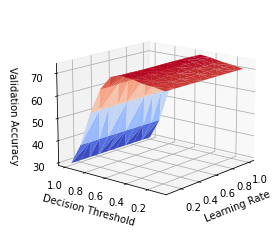

In [87]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_trisurf(grid[:,0], grid[:,1], average_val_acc, cmap=cm.coolwarm,
                       linewidth=0)
ax.view_init(15, 220)
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Decision Threshold')
ax.set_zlabel('Validation Accuracy')
plt.show()

#### Question 2.1.2
***

Finally we retrain the model on the whole dataset using the optimal hyperparameters and compare the mean accuracies:

In [64]:
# Retrain the model using the optimal paramaters
d = model(X_train.T, Y_train, X_test.T, Y_test, decision_threshold=optimal_parameters[1],
          num_iterations=5000, learning_rate=optimal_parameters[0])

# Mean Accuracies
print("Training set accuracy: {} %".format(d["train_acc"]))
print("Test set accuracy    : {} %".format(d["test_acc"]))

Training set accuracy: 74.375 %
Test set accuracy    : 74.0 %


We observe that the mean accuracies of our optimal model are fairly close to eachother and well above 50%, which suggests that overfitting has not occured. 
However clearly there is still room for improvement.

### 2.2 Random Forest
***

#### Question 2.2.1
***

As decision trees are the building blocks of random forests, we start by creating an appropriate decision tree model for the data.

Once again we check the first few rows of our data.

In [89]:
df_X_train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.16176470588235292,0.25,0.36315615714757354,0.25,0.0,0.0,0.33333333333333326,0.33333333333333326,0.26785714285714285,1.0,1.0
1,0.4705882352941176,0.5,0.8587542643336633,0.0,0.0,0.33333333333333326,0.6666666666666667,0.6666666666666665,0.4285714285714285,1.0,0.0
2,0.1176470588235294,0.0,0.1380543633762518,0.0,1.0,0.33333333333333326,1.0,0.33333333333333326,0.26785714285714285,0.6666666666666665,0.0
3,0.4705882352941176,0.5,0.17585561791570375,0.0,1.0,1.0,0.33333333333333326,0.6666666666666665,0.41071428571428575,0.6666666666666665,0.0
4,0.6470588235294117,0.0,0.2396280400572246,0.0,1.0,0.6666666666666667,1.0,1.0,0.0892857142857143,0.6666666666666665,0.0


We observe that the data consists of continuous variables, so we start by adapting the decision tree from the coding task which was constructed for discrete data:

Also instead of using the gini index, we will use the cross entropy as the information criterion to measure the quality of the classification for a given split.

The formula I am using for the entropy is:
$$ - \sum_{k=1}^{K} \hat{p}_{mk} \log(\hat{p}_{mk}) $$ 
where $\hat{p}_{mk}$ is the porportion of class k observations in node m.

The source of this formula is from Page 309, Chapter 9.2 of the book "The Elements of Statistical Learning" - Trevor Hastie, Robert Tibshirani, Jerome Friedman

We define a function to calculate the cross entropy:

In [91]:
def cross_entropy(y, sample_weights=None):
    """ 
    Calculate the cross_entropy for labels.
    Arguments:
        y: vector of training labels, of shape (N,).
        sample_weights: weights for each samples, of shape (N,).
    Returns:
        (float): the cross entropy for y.
    """
    if sample_weights is None:
        sample_weights = np.ones(y.shape[0]) / y.shape[0]
    
    ce = 0
    num = y.shape[0]  # number of labels
    label_counts = {}  # caculate different labels in y，and store in label_counts
    for i in range(num):
        if y[i] not in label_counts.keys():
            label_counts[y[i]] = 0
        label_counts[y[i]] += sample_weights[i]
    
    for key in label_counts:
        prob = float(label_counts[key]) / float(np.sum(sample_weights))
        ce -= prob * np.log(prob)
    
    return ce

Next we have the functions that split the data into two regions given a column and a value, and also a function to calculate the total cross entropy for every feature:

In [96]:
def split_dataset(X, y, column, value, sample_weights=None):
    # create two regions R1 and R2
    R1 = []
    R2 = []
    featVec = X[:, column]
    
    # selecting all columns of X except the "column" we are splitting on
    X = X[:,[i for i in range(X.shape[1]) if i!=column]]  
    
    for i in range(len(featVec)):
        # we use <= instead of < as we are dealing with continuous data
        if featVec[i] <= value:
            R1.append(i)
        else:
            R2.append(i)   
            
    # create the split regions in terms of X and y variables
    X1 = X[R1,:]
    y1 = y[R1]
    X2 = X[R2,:]
    y2 = y[R2]
    
    # return the list of splits
    if sample_weights is None:
        return [(X1, y1), (X2, y2)]
    else:
        return [(X1, y1, sample_weights[R1]) , (X2, y2, sample_weights[R2])]

def cross_entropy_calculate(X, y, column, value, sample_weights=None):
    
    if sample_weights is None:
        sample_weights = np.ones(y.shape[0]) / y.shape[0]
    
    information_gain = 0
    new_cost = 0.0
    
    old_cost = cross_entropy(y, sample_weights)
    
    # split the values of i-th feature and calculate the cost of the split
    for sub_X, sub_y, sub_sample_weights in split_dataset(X, y, column, value, sample_weights):
        prob = np.sum(sub_sample_weights) / float(np.sum(sample_weights))
        
        # New cost (cross entropy multiplied by a weighted prob depending on the sample weights)
        new_cost += prob * cross_entropy(sub_y, sub_sample_weights)
  
    # information gain
    information_gain = old_cost - new_cost 

    return information_gain

Then we create a function to choose the best feature to split on according to the information gain for each feature.

In [97]:
def choose_best_feature(X, y, max_features, sample_weights=None):
    
    # create sample_weights if not there already
    if sample_weights is None:
        sample_weights = np.ones(y.shape[0]) / y.shape[0]
        
    n_features = X.shape[1]
    
    # ensure the number of features chosen are not more than max_features
    if n_features > max_features:
        n_features = max_features
    
    # initialise variables
    best_split=None
    best_gain_cost = 0.0
    
    # shuffle the indices so we don't choose the first n features each time
    indices = np.arange(X.shape[1])
    np.random.shuffle(indices)
    
    # loop through the features
    for feat_index in indices[:max_features]:
        
        # find the unique values for a given feature and loop through these
        unique_values = np.unique(X[:, feat_index])
        for val in unique_values:
            # for each value calculate the cross entropy
            info_gain_cost = cross_entropy_calculate(X, y, feat_index, val, sample_weights)
            # check if this is better than the best split so far and update if it is
            if info_gain_cost > best_gain_cost:
                best_gain_cost = info_gain_cost
                best_split = (feat_index, val)     
    
    return best_split

Then a function to return the majority label of a vector of labels:

In [95]:
def majority_vote(y, sample_weights=None):
    """
    Return the label which appears the most in y.
    Args:
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
    Returns:
      (int): the majority label
    """
    if sample_weights is None:
      sample_weights = np.ones(y.shape[0]) / y.shape[0]

    majority_label = y[0]

    dict_num = {}
    for i in range(y.shape[0]):
      if y[i] not in dict_num.keys():
          dict_num[y[i]] = sample_weights[i]
      else:
          dict_num[y[i]] += sample_weights[i]

    majority_label = max(dict_num, key=dict_num.get)
    return majority_label

Finally we have the function to build the optimal decision tree by calling all the functions above:

In [99]:
def build_tree(X, y, feature_names, max_features, max_depth, current_depth, sample_weights=None, min_samples_leaf=2):
    """Build the decision tree according to the data.
    X and y arguments:
        X: (np.array) training features, of shape (N, D).
        y: (np.array) vector of training labels, of shape (N,).
    Returns:
        (dict): a dict denoting the decision tree. 
        <tree> ::= node:'leaf' label:<iris-categ>
                |  node:'split' feature-name:<col-name> value:<num> leaf:<tree> right:<tree>  
    """
    mytree = dict()
    
    # include a clause for the cases where (i) no feature, (ii) all lables are the same, 
    # (iii) depth exceed, or (iv) X is too small, or (v) X consists of exactly the same features
    if (len(feature_names)==0 or len(np.unique(y))==1 or 
        current_depth>=max_depth or len(X)<=min_samples_leaf or len(np.unique(X, axis = 0))) == 1:
        
        mytree = {'node':'leaf' ,  'label': majority_vote(y, sample_weights)}
        return mytree
    
    best_split = choose_best_feature(X, y, max_features, sample_weights)    
    
    # case where there is no best split
    if best_split == None:
        mytree = {'node':'leaf' ,  'label': majority_vote(y, sample_weights)}
        return mytree
    
    else:  
        # retrieve the feature and value of the best_split
        best_feature_idx, value = best_split
        best_feature_name = feature_names[best_feature_idx]
        
        # remove the feature name used for this split from the list of names
        feature_names = feature_names[:]
        feature_names.remove(best_feature_name)
        
        # split the data according to the best split
        splits = split_dataset(X, y, best_feature_idx, value, sample_weights)
        
        # create the tree for this specific split
        mytree = {'node':'split', 'feature_name':best_feature_name, 'value':value}
        
        # obtain the information for the two regions of the split
        sub_X_left, sub_Y_left, sub_sample_weight_left = splits[0]
        sub_X_right, sub_Y_right, sub_sample_weight_right = splits[1]
        
        # expand the tree by recursively calling the same function to making further splits for each new region
        mytree['Left'] = build_tree(sub_X_left, sub_Y_left, feature_names, max_features, max_depth, current_depth+1, sub_sample_weight_left) 
        mytree['Right'] = build_tree(sub_X_right, sub_Y_right, feature_names, max_features, max_depth, current_depth+1, sub_sample_weight_right) 
          
        return mytree

We also have a overall function to train the tree with the hyperparameters as arguments:

In [100]:
def train_decision_tree(X, y, max_features, max_depth, sample_weights=None):
    """
    Build the decision tree according to the training data.
    """
    if sample_weights is None:
        # if the sample weights is not provided, we assume the samples have uniform weights
        sample_weights = np.ones(X.shape[0]) / X.shape[0]
    else:
        sample_weights = np.array(sample_weights) / np.sum(sample_weights)
    
    feature_names = X.columns.tolist()
    X = np.array(X)
    y = np.array(y)
    tree = build_tree(X, y, feature_names, max_features, max_depth, current_depth=1, sample_weights=sample_weights)
    return tree

Then we have two further functions: "classify" to classify a data point given a tree and the point, and "predict" to call this function for for every data point from a set.

In [101]:
def classify(tree, x):
    """
    Classify a single sample with the fitted decision tree.
    Args:
        x: ((pd.Dataframe) a single sample features, of shape (D,).
    Returns:
        (int): predicted testing sample label.
    """
    # check if there is no further split
    if tree['node'] == 'leaf':
        return tree['label']
        # if there is a further split, check which region the data point belongs to
    else:
        feat_name = tree['feature_name']
        val = x.loc[feat_name]
        # go the the appropriate region and recursively call the classify function
        if (val <= tree['value']):
            return classify(tree['Left'],x)
        else:
            return classify(tree['Right'],x)

def predict(tree, X):
    """
    Predict classification results for X.
    Args:
        X: (pd.Dataframe) testing sample features, of shape (N, D).
    Returns:
        (np.array): predicted testing sample labels, of shape (N,).
    """
    if len(X.shape)==1:
        return classify(tree, X)
    else:
        results=[]
        for i in range(X.shape[0]):
            results.append(classify(tree, X.iloc[i, :]))
        return np.array(results)

We also create a score function to measure the accuracy of our predictions:

In [103]:
def score(tree, X_test, y_test):
    y_pred = predict(tree, X_test)
    return np.float(sum(y_pred==y_test)) / float(len(y_test))

Now that we have our code to create decision trees and get predictions using them, we move on to random forests.
The first step of random forests is bootstrapping. That is, producing samples of size $N'$ from the training data (where $N' < N$ and $N$ is the size of the training data). These samples are with replacement.

The following function performs bootstrapping and has N_trees as the argument for the number of samples. The bootstrapped sets are stored in dictionaries.

In [104]:
# Create a bootstrapped dataset given a data frame
def bootstrap(df_data, N_trees):
    # dictionary to store each sample
    boot_data = dict()
    
    # random sampling with replacement
    for i in range(N_trees):
        boot_data[i] = df_data.sample(n = int(len(X_train) * 9/10), replace = True)
        
    return boot_data

The next step of random forests is to get an ensemble of decision trees, one for each sample of the bootsrapped dataset. This is done in the function below, and the trees are stored and returned in a dictionary "boot_tree":

In [105]:
def randforest(df_X_y, N_trees, max_features, max_depth, sample_weights=None):
    
    # bootstrap the data and create samples
    boot_data = bootstrap(df_X_y, N_trees)
        
    # create a dictionary to store each tree
    boot_tree = {}
    
    # for each sample of the data create a decision tree
    for i in range(N_trees):
        # split the aggregated X and y into separate arrays again
        boot_df_X_y = boot_data[i]
        boot_df_X = boot_df_X_y[boot_df_X_y.columns[:-1]]
        boot_df_y = boot_df_X_y[boot_df_X_y.columns[-1]]

        boot_tree[i] = train_decision_tree(boot_df_X, boot_df_y, max_features, max_depth)
    
    return boot_tree

The next step is to aggregate the ensemble of models to create a single prediction for each data point.
Here we implement this for a single data point in the function "classify_random_forest" by hard voting which takes the majority of the class labels.

The "predict_random_forest" function repeats this for each data point in a given set using a given ensemble of trees, and a vector of predicted values is returned:

In [109]:
def classify_random_forest(boot_tree, x):
    """
    Classify a single sample with the fitted decision tree.
    Returns:
        (int): predicted testing sample label.
    """
    # create a list of values predicted by the tree
    tree_preds = []
    
    for i in range(len(boot_tree)):
        tree_preds.append(classify(boot_tree[i], x))
    
    # find frequency of each value
    freq_counter = Counter(tree_preds)
    freq_dict = dict(freq_counter)
    
    max_freq = max(list(freq_counter.values()))
    modal_values = [num for num, freq in freq_dict.items() if freq == max_freq]
    # in case there are multiple modal values, randomly choose from the list
    label = modal_values[np.random.randint(0, len(modal_values))]
    
    return label

def predict_random_forest(boot_tree, X):
    """
    Predict classification results for X.
    """
    if len(X.shape)==1:
        return classify_random_forest(boot_tree, X)
    else:
        results=[]
        for i in range(X.shape[0]):
            results.append(classify_random_forest(boot_tree, X.iloc[i, :]))
        return np.array(results)

As with the decision tree, we have a score function to measure the accuracy of our predictions for a particular random forest.

In [110]:
def score_random_forest(boot_tree, X_test, y_test):
    y_pred = predict_random_forest(boot_tree, X_test)
    return np.float(sum(y_pred==y_test)) / float(len(y_test))

In order to perform cross validation, we create a function that has the folds and the three hyperparameters we are interest in (N_trees, max_features, max_depth) as arguments and returns the training and validation accuracies for each fold:

In [111]:
def cross_val_evaluate_random_forest(folds, N_trees, max_features, max_depth):
    # create dictionaries
    train_acc = {1:[], 2:[], 3:[], 4:[], 5:[]}
    val_acc = {1:[], 2:[], 3:[], 4:[], 5:[]}
    
    for i in range(len(folds)):
        
        # print('Fold', i+1)
        # define the training set (i.e. selecting all folds and deleting the one used for validation)
        train_set = np.delete(np.asarray(folds).reshape(len(folds), folds[0].shape[0], folds[0].shape[1]), i, axis=0)
        train_folds = train_set.reshape(len(train_set)*train_set[0].shape[0], train_set[0].shape[1])
        X_train = train_folds[:,:-1]
        y_train = train_folds[:, -1]
        
        # define the validation set
        val_fold = folds[i]
        X_val = val_fold[:,:-1]
        y_val = val_fold[:, -1]
    
        # convert whole training set, X_train and X_val into panda data frames as required
        df_train = pd.DataFrame(train_folds)
        df_X_train = pd.DataFrame(X_train)
        df_X_val = pd.DataFrame(X_val)
        
        # train the random forest and obtain the trees
        boot_tree = randforest(df_train, N_trees, max_features, max_depth, sample_weights=None)
        
        # obtain the accuracies and store in the appropriate dictionaries
        train_accuracy = score_random_forest(boot_tree, df_X_train, y_train)
        val_accuracy = score_random_forest(boot_tree, df_X_val, y_val)
        
        train_acc[i+1].append(train_accuracy)
        val_acc[i+1].append(val_accuracy)
        
    return train_acc, val_acc

In order to scan the parameters we create vector of possible values for each hyperparameter:

In [117]:
# Vectors of hyperparameters
N_trees_vec = np.array([4, 8, 12, 16, 20])
max_features_vec = np.array([2, 4, 6, 8, 10])
max_depth_vec = np.array([2, 4, 6, 8, 10])

I chose to restrict the number of values I scan though as this process proved to be very computationally expensive for large vectors, in some cases taking up to an hour for vectors of 10 values.

Further I restricted the range of the parameter for the maximum number of descriptors at each split (max_features) to between 2 and 10 as it was stated that in lectures that the guideline or this number is approximately $\frac{p}{3}$ (where $p$ is the number f predictors), and here we have that p = 11.

Similarly I chose to restrict the maximum depth (max_depth) of the trees as there are only 11 descriptors in total, and overfitting could occur if the depth is too large.

Further, a grid search over every combination of the hyperparameters proved to be unnecessarily computationally expensive.
So I decided to fix the number of decision trees and perform a grid search over max_features and max_depth first:

[Note this can take around 10 minutes]

In [115]:
# Create matrices to store accuracies
train_acc_matrix = np.zeros((5,5))
val_acc_matrix = np.zeros((5,5))

# Grid Search over max_features and max_depth keeping N_trees fixed at 5
for j, max_feat in enumerate(max_features_vec):
    print("Outer Loop: " + str(j+1)+ "/5")
    for k, max_depth in enumerate(max_depth_vec):
        train_accuracy, val_accuracy = cross_val_evaluate_random_forest(folds, 5, max_feat, max_depth)
        mean_train_accuracy = np.mean([train_accuracy[i][0] for i in range(1,6)])
        mean_val_accuracy = np.mean([val_accuracy[i][0] for i in range(1,6)])
        
        train_acc_matrix[j,k] = mean_train_accuracy
        val_acc_matrix[j,k] = mean_val_accuracy

Outer Loop: 1/5
Outer Loop: 2/5
Outer Loop: 3/5
Outer Loop: 4/5
Outer Loop: 5/5


From this we can find the optimal pair of these hyperparamaters:

In [116]:
optimal_indices = np.where(val_acc_matrix == val_acc_matrix.max())
optimal_max_features = max_features_vec[optimal_indices[0][0]]
optimal_max_depth = max_depth_vec[optimal_indices[1][0]]

Next, using these optimal values, I varied the number of trees using the N_trees vector to find the optimal number of decision trees:

[Note this can take a couple of minutes]

In [118]:
# Create matrices to store accuracies
train_acc_matrix = np.zeros(5)
val_acc_matrix = np.zeros(5)

for i, N_trees, in enumerate(N_trees_vec):
    print("Loop: " + str(i+1)+ "/5")
    train_accuracy, val_accuracy = cross_val_evaluate_random_forest(folds, N_trees, optimal_max_features, optimal_max_depth)
    mean_train_accuracy = np.mean([train_accuracy[k][0] for k in range(1,6)])
    mean_val_accuracy = np.mean([val_accuracy[k][0] for k in range(1,6)])
    
    train_acc_matrix[i] = mean_train_accuracy
    val_acc_matrix[i] = mean_val_accuracy
    
optimal_index = np.where(val_acc_matrix == val_acc_matrix.max())
optimal_N_trees = N_trees_vec[optimal_index[0][0]]

Loop: 1/5
Loop: 2/5
Loop: 3/5
Loop: 4/5
Loop: 5/5


These optimal hyperparameters are summarised below:

[In case the code takes a long time to execute, for reference the optimal parameters for this seed were: (16, 6, 2)]

In [119]:
rand_forest_hyper = np.array([[optimal_N_trees], [optimal_max_depth], [optimal_max_features]])
rand_forest_hyper_df = pd.DataFrame(rand_forest_hyper.T, 
                                    columns = ["Number of Decision Trees", 
                                               "Depth of Trees", 
                                               "Maximum Number of Descriptors"], 
                                    index = ["Optimal Value"])
rand_forest_hyper_df

,Number of Decision Trees,Depth of Trees,Maximum Number of Descriptors
Optimal Value,16,6,2


#### Question 2.2.2
***

Finally we train the random forest model using the set of optimal hyperparameters and compute the accuracies:

In [121]:
boot_tree = randforest(train_data, optimal_N_trees, optimal_max_features, optimal_max_depth, sample_weights=None)
print('Random Forest - In-Sample accuracy     :', score_random_forest(boot_tree, df_X_train, df_Y_train))
print('Random Forest - Out-of-Sample accuracy :', score_random_forest(boot_tree, df_X_test, df_Y_test))

Random Forest - In-Sample accuracy     : 0.76875
Random Forest - Out-of-Sample accuracy : 0.7


Next using the predictions, we create a confusion matrix to see better visualise the accuracy of our predictions:

[ Note the code used for constructing the confusion matrix is adapted from: https://datatofish.com/confusion-matrix-python/ ]

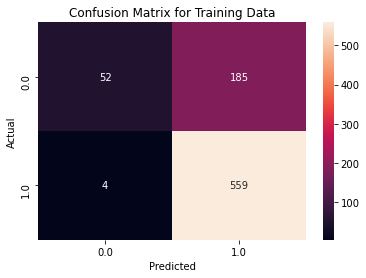

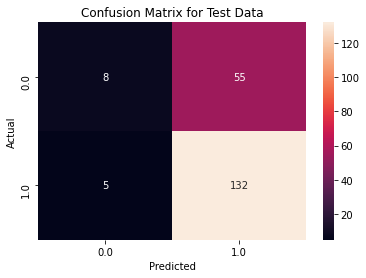

In [122]:
# obtain the predictions
Y_train_preds = predict_random_forest(boot_tree, df_X_train)
Y_test_preds = predict_random_forest(boot_tree, df_X_test)

# construct the confusion matrices
df_data_train = pd.DataFrame({'y_Actual [Train]': Y_train, 'y_Predicted [Train]': Y_train_preds})
df_data_test = pd.DataFrame({'y_Actual [Test]': Y_test, 'y_Predicted [Test]': Y_test_preds})

confusion_matrix_train = pd.crosstab(df_data_train['y_Actual [Train]'], df_data_train['y_Predicted [Train]'], 
                                     rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_test = pd.crosstab(df_data_test['y_Actual [Test]'], df_data_test['y_Predicted [Test]'], 
                                    rownames=['Actual'], colnames=['Predicted'])

# plot the matrices
ax = sns.heatmap(confusion_matrix_train, annot=True, fmt='g')
plt.title("Confusion Matrix for Training Data")
plt.show()

sns.heatmap(confusion_matrix_test, annot=True, fmt='g')
plt.title("Confusion Matrix for Test Data")
plt.show()

We can note that for both datasets, that for data points where the actual value is 1, the model correctly predicts this label for the vast majority (for example 132 / 137 times for the test data). Thus the model seems to have a high true postive rate.

However for points where the actual value is 0, the model incorrectly predicts the label 1 more often than not.
This is suggests that the true negative rate is not very good (8 / 63 for the test data).

The fact that the accuracies shown above are fairly consistent in and out-of-sample suggests that overfitting might not be occuring. However we do see that in these data sets the model is far more likely to predict the label 1 than 0 (which is representative of the datasets), but we cannot be sure that the model will still be appropriate if we get a completely new dataset with a different distribution of 1s and 0s.

So we see that the random forest model performs classification to a fairly high degree of accuracy, but improvements can still be made by further tuning the hyperparameters more precisely, however these will always come with the added cost of computational time.